In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn import metrics


%matplotlib inline
# to make prettier plots 
# from: https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [2]:
def compute_PCA(data_stand, n_components=2):
    pca = PCA()
    X = pca.fit_transform(data_stand)
    principal_df = pd.DataFrame(data = X)
    cum_exp_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(cum_exp_var)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance')
    # write the cumulative explained variance on the plot
    for i, ev in enumerate(cum_exp_var):
        ax.text(i, cum_exp_var[i]-1.5, np.round(ev), 
                ha='left', va='top', fontsize=10)
        # put a point 
        ax.scatter(i, cum_exp_var[i], s=50, c='blue', marker='o')
    plt.show()
    return principal_df, pca

def plot_2D_embedding(principal_df, cluster_labels=None):
    # 2D plotting PCA
    fig, ax = plt.subplots(figsize=(8, 6))
    color = cluster_labels if cluster_labels is not None else "royalblue"
    ax.scatter(principal_df[0],
                principal_df[1],
                    c=color,
                    cmap='viridis',
                )
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title('2 component PCA', fontsize=20)
    ax.grid()
    plt.show()
    return fig, ax

    


# Fails to detect Clusters 

In [3]:
X, int_labels = make_blobs(n_samples=200, centers=2, n_features=2,
                            cluster_std=3, random_state=0, shuffle=False)
cluster_size = X.shape[0]//2
z = np.concatenate([2*np.ones(cluster_size), -2*np.ones(cluster_size)])


X = np.c_[z, X]

# plot 3D 

fig = px.scatter_3d(x=X[:, 0],
                    y=X[:, 1],
                    z=X[:, 2],
                    size_max=0.1)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

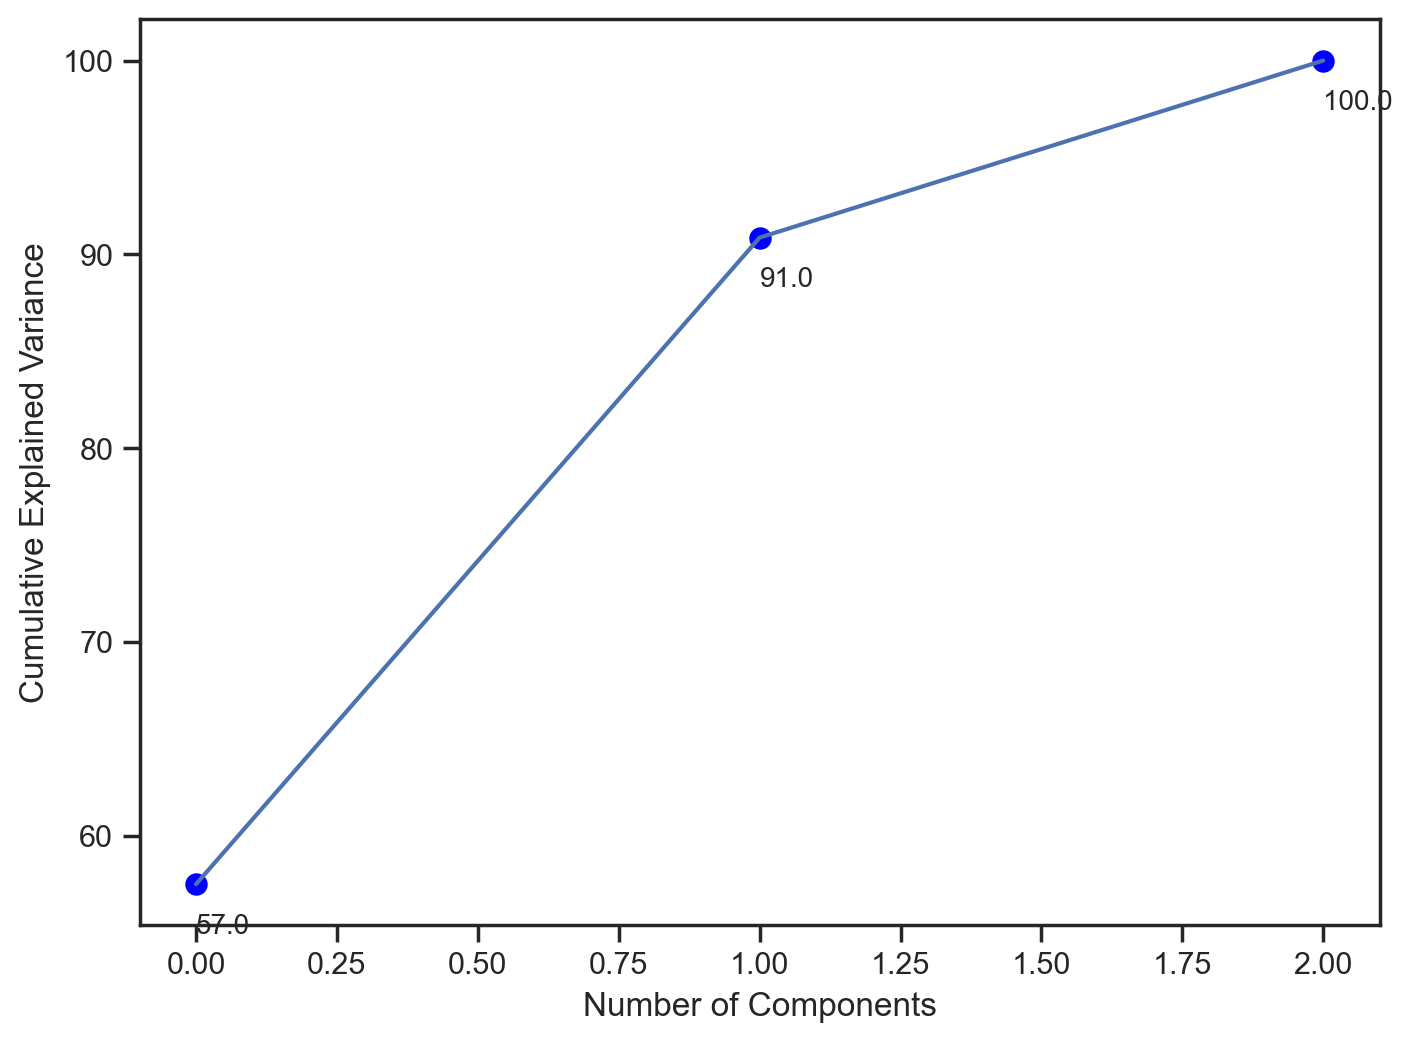

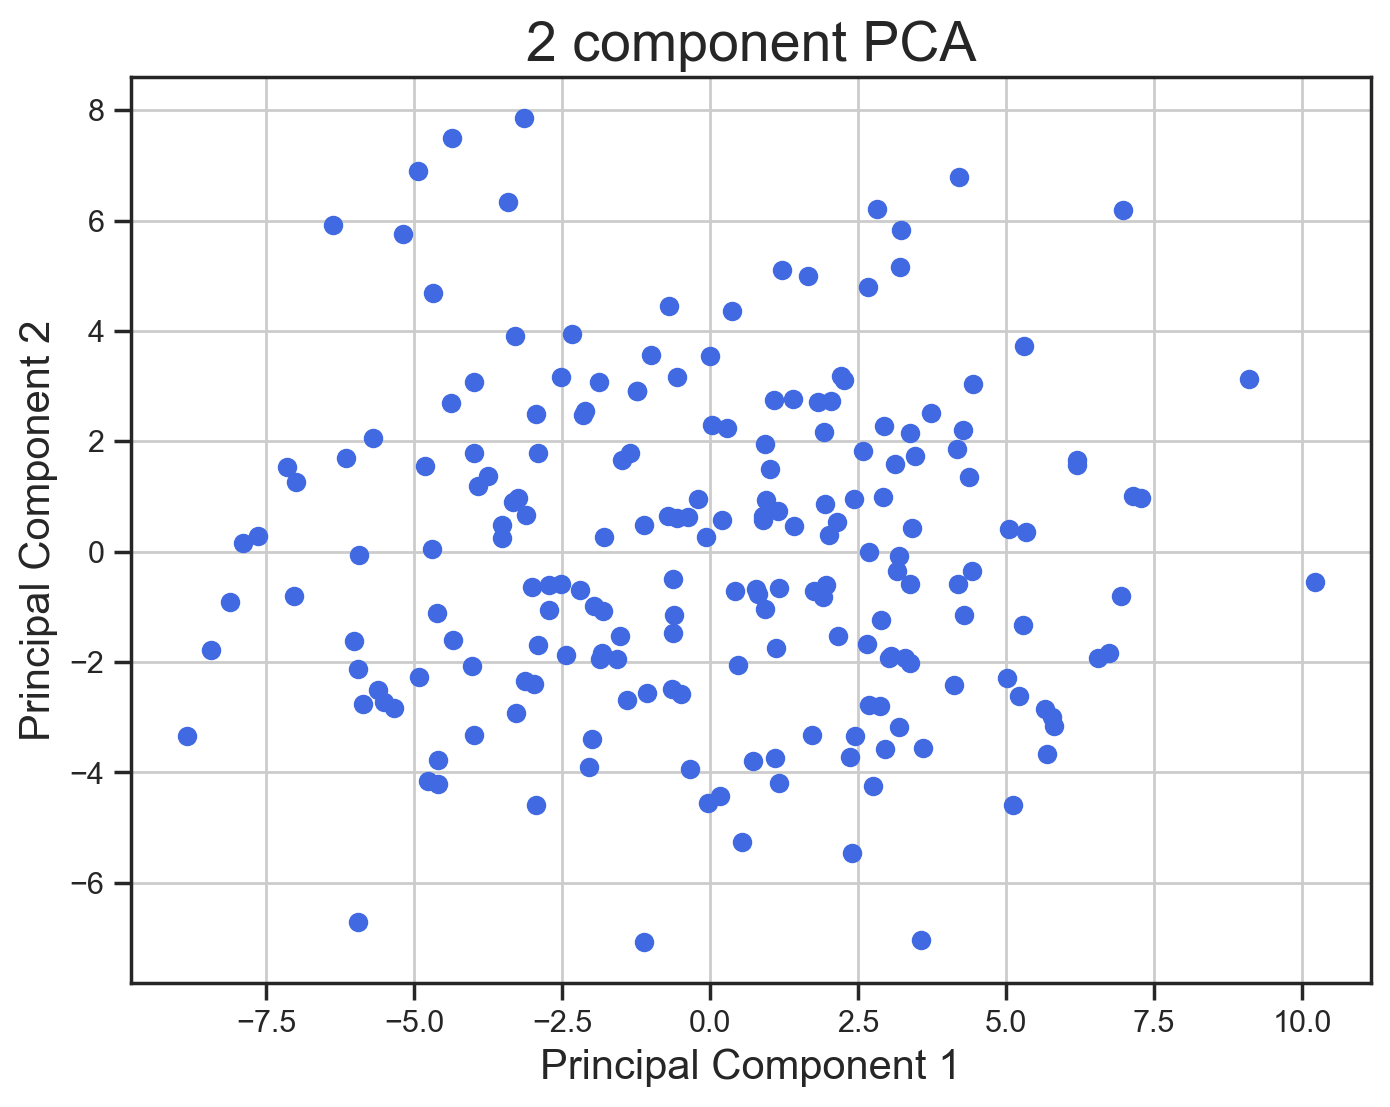

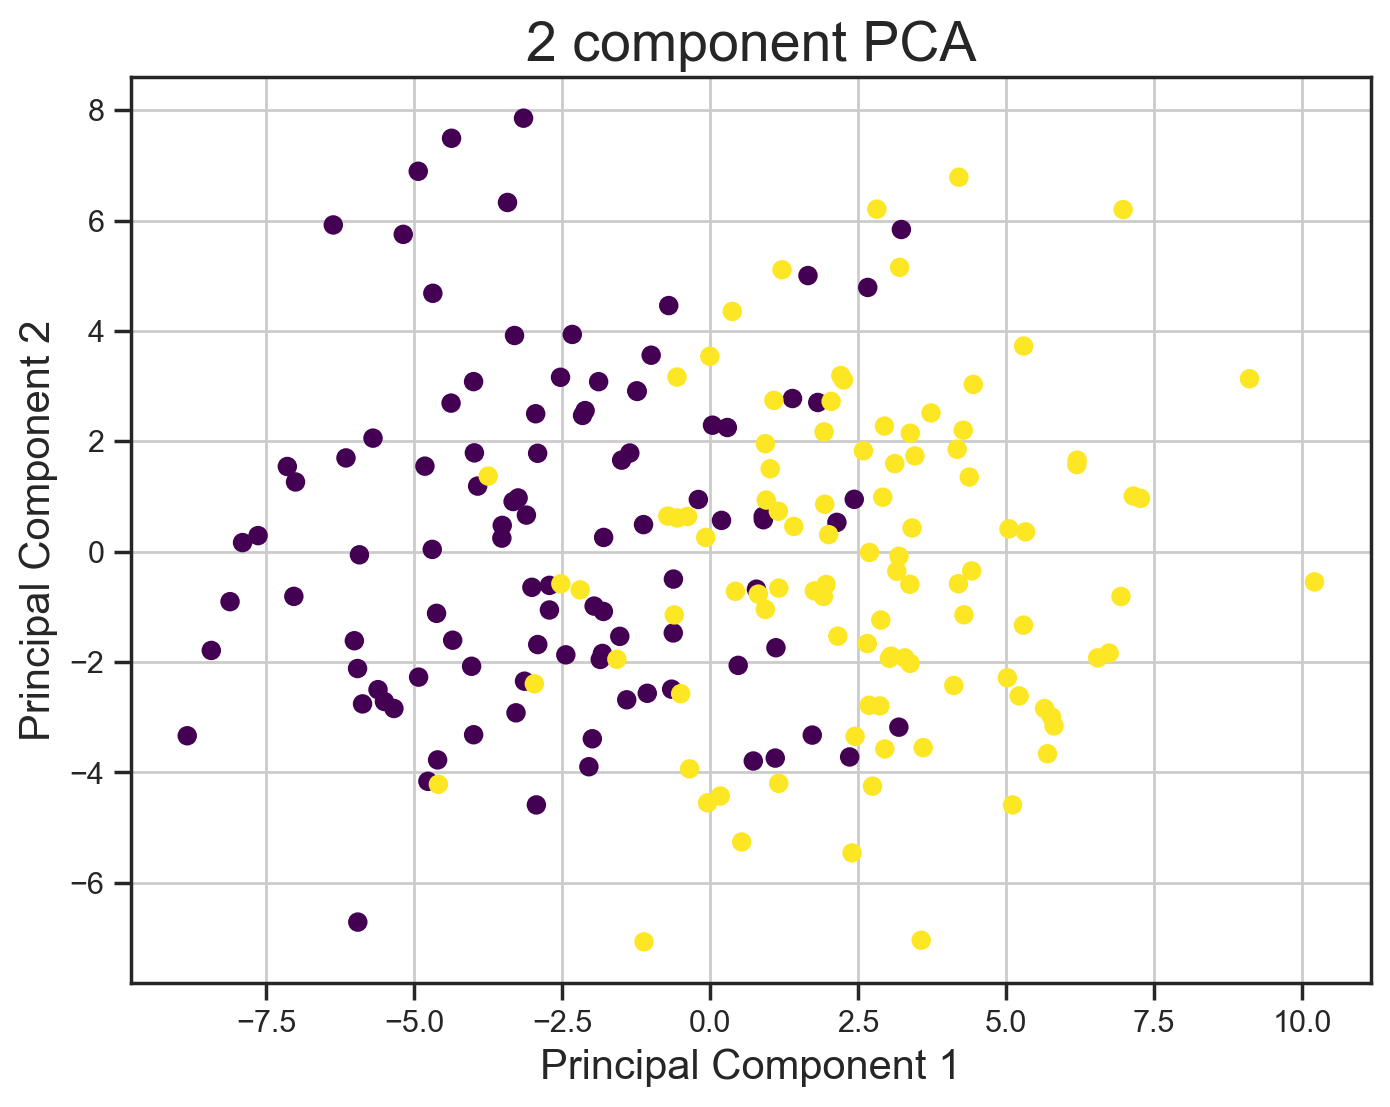

In [4]:
X_pca, _ = compute_PCA(X, n_components=2)

# what we see if we do not have labels (which is usually the case)
fig, ax = plot_2D_embedding(X_pca)
# even if we have labels, it is confusing to see the clusters
fig, ax = plot_2D_embedding(X_pca, cluster_labels=int_labels)


## KMeans

Number of clusters: 1
Adjusted Rand Index:  0.000
Number of clusters: 2
Adjusted Rand Index:  0.446
The average silhouette_score is : 0.35393467748134533
Number of clusters: 3
Adjusted Rand Index:  0.285
The average silhouette_score is : 0.3151233684310002
Number of clusters: 4
Adjusted Rand Index:  0.240
The average silhouette_score is : 0.2887920805244412
Number of clusters: 5
Adjusted Rand Index:  0.194
The average silhouette_score is : 0.2947662276510764
Number of clusters: 6
Adjusted Rand Index:  0.280
The average silhouette_score is : 0.3163849968354373
Number of clusters: 7
Adjusted Rand Index:  0.235
The average silhouette_score is : 0.3182999832777801
Number of clusters: 8
Adjusted Rand Index:  0.232
The average silhouette_score is : 0.3186054024813382
Number of clusters: 9
Adjusted Rand Index:  0.221
The average silhouette_score is : 0.3212677182400617


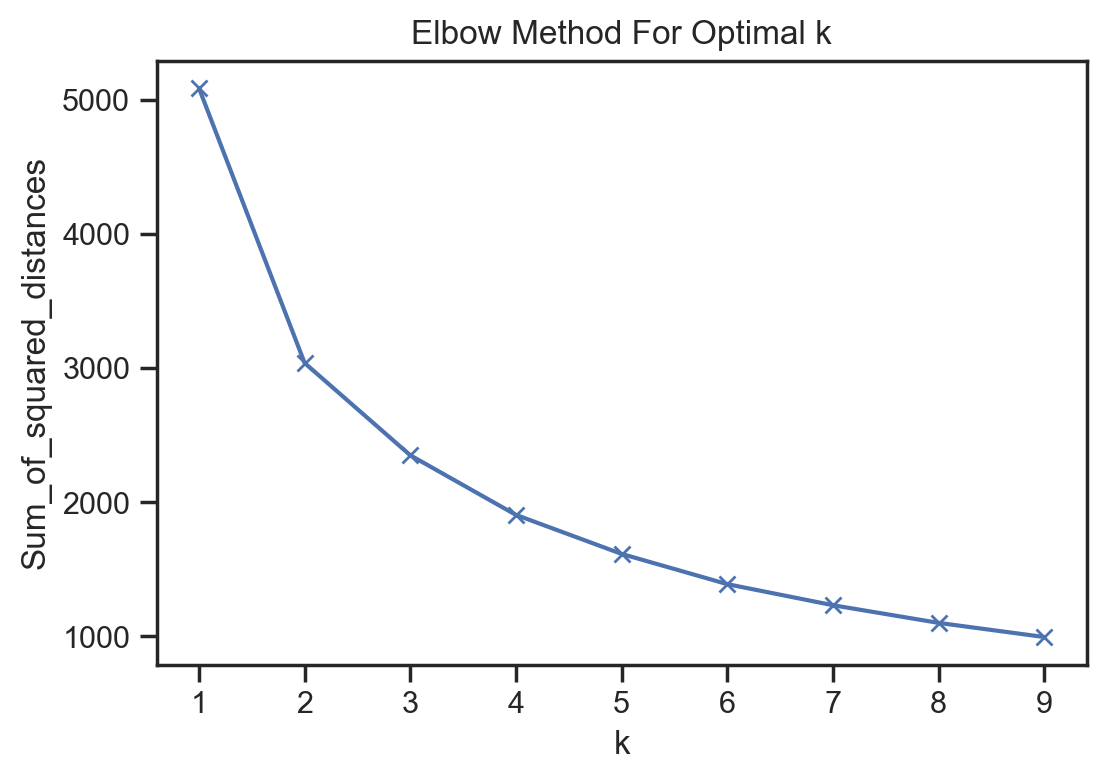

In [5]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=100, algorithm='full')
    km = km.fit(X)
    # labels 
    cluster_labels = km.labels_
    Sum_of_squared_distances.append(km.inertia_)
    print(f"Number of clusters: {k}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(int_labels, cluster_labels): .3f}")
    if k>1:
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        print("The average silhouette_score is :", silhouette_avg)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fake Clusters


In [7]:
# two clear clusters
# one of them will be stretched for many times to 'catch' the PCA looking for variance, then it stops
# and go to the forth dimension to link with the other cluster

cluster_size = 100
X, int_labels = make_blobs(n_samples=2*cluster_size, n_features=2, centers=[(1,-1), (1,1)], cluster_std=1.5, shuffle=False)
# attach the label because we are going to shuffle the data
X = np.c_[X, int_labels]


z = np.concatenate([2*np.ones(cluster_size), -2*np.linspace(0, 3, cluster_size)])
X = np.c_[z, X]

# shuffle X 
np.random.shuffle(X)
w = np.linspace(0, 4.5, cluster_size*2) 
X = np.c_[w, X]

# separate the labels

int_labels = X[:,-1]
X = X[:, :-1]

# plot 3D 

fig = px.scatter_3d(x=X[:, 1],
                    y=X[:, 2],
                    z=X[:, 3],
                  size_max=0.1)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


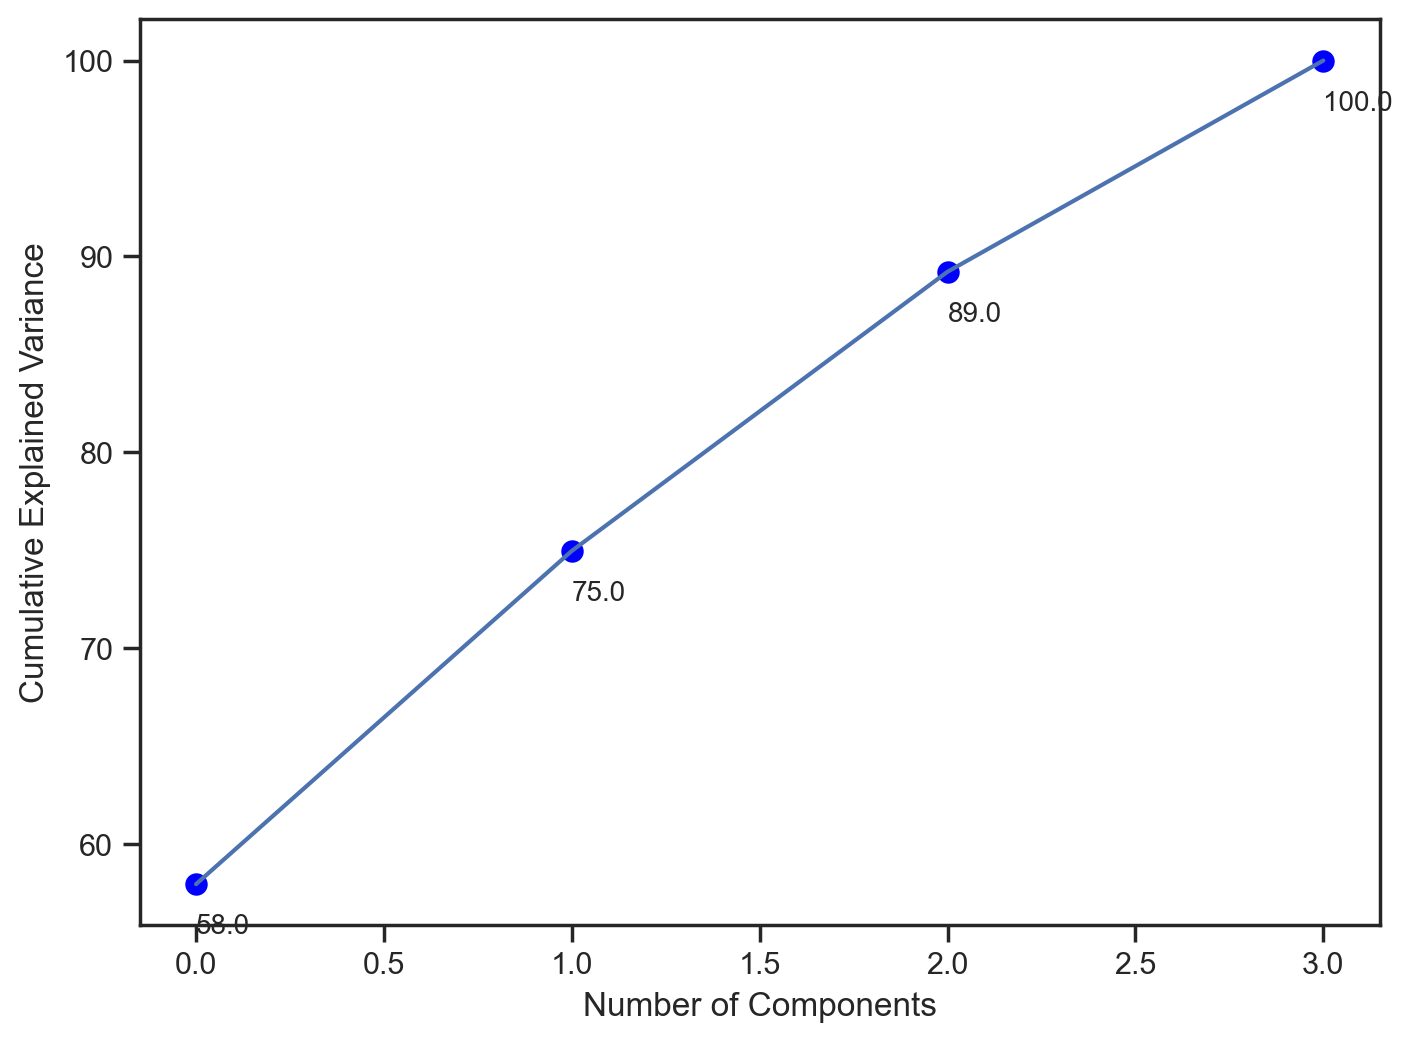

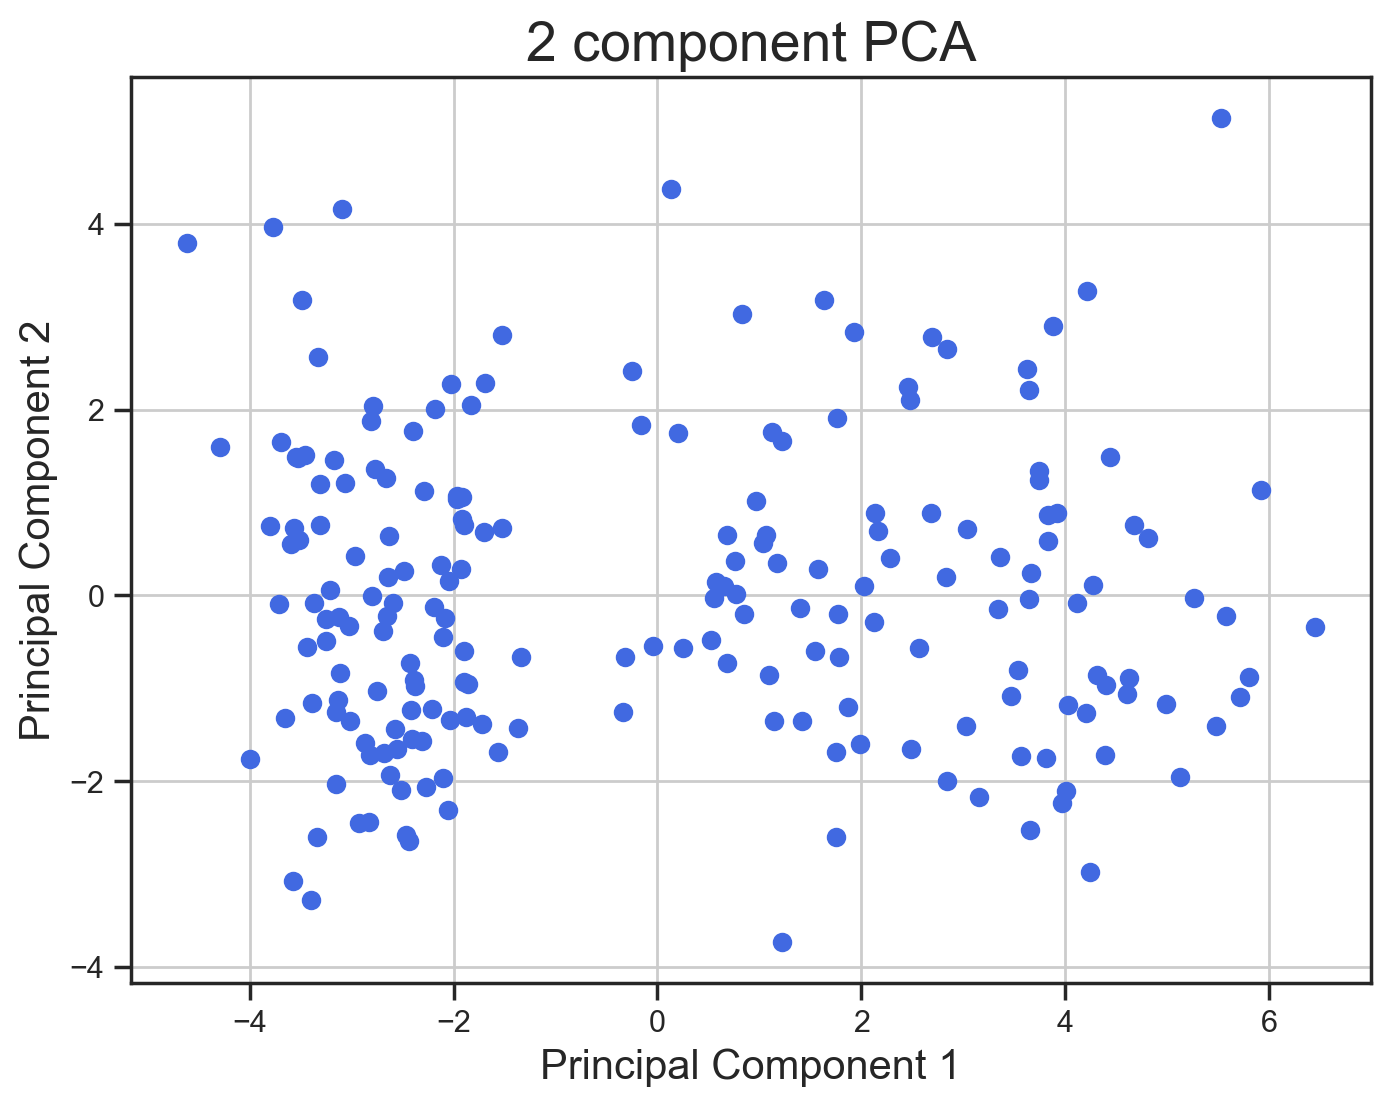

In [8]:
# PCA 
X_pca, _ = compute_PCA(X, n_components=2)

# You think you captured the clusters
fig, ax = plot_2D_embedding(X_pca)


In [9]:
# there are actually no clusters 
# data are linked in the forth dimension
# plot 3D 
fig = px.scatter_3d(x=X[:, 0],
                    y=X[:, 2],
                    z=X[:, 3],
                    color=int_labels,
                  size_max=0.1)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## KMeans 

Number of clusters: 1
Adjusted Rand Index:  0.000
Number of clusters: 2
Adjusted Rand Index:  0.846
The average silhouette_score is : 0.40887082031308153
Number of clusters: 3
Adjusted Rand Index:  0.531
The average silhouette_score is : 0.26935565602004297
Number of clusters: 4
Adjusted Rand Index:  0.479
The average silhouette_score is : 0.22143189714577358
Number of clusters: 5
Adjusted Rand Index:  0.284
The average silhouette_score is : 0.23414037147278713
Number of clusters: 6
Adjusted Rand Index:  0.334
The average silhouette_score is : 0.24791276146804925
Number of clusters: 7
Adjusted Rand Index:  0.301
The average silhouette_score is : 0.25314348798532504
Number of clusters: 8
Adjusted Rand Index:  0.246
The average silhouette_score is : 0.24139392098214502
Number of clusters: 9
Adjusted Rand Index:  0.230
The average silhouette_score is : 0.24804325923603762


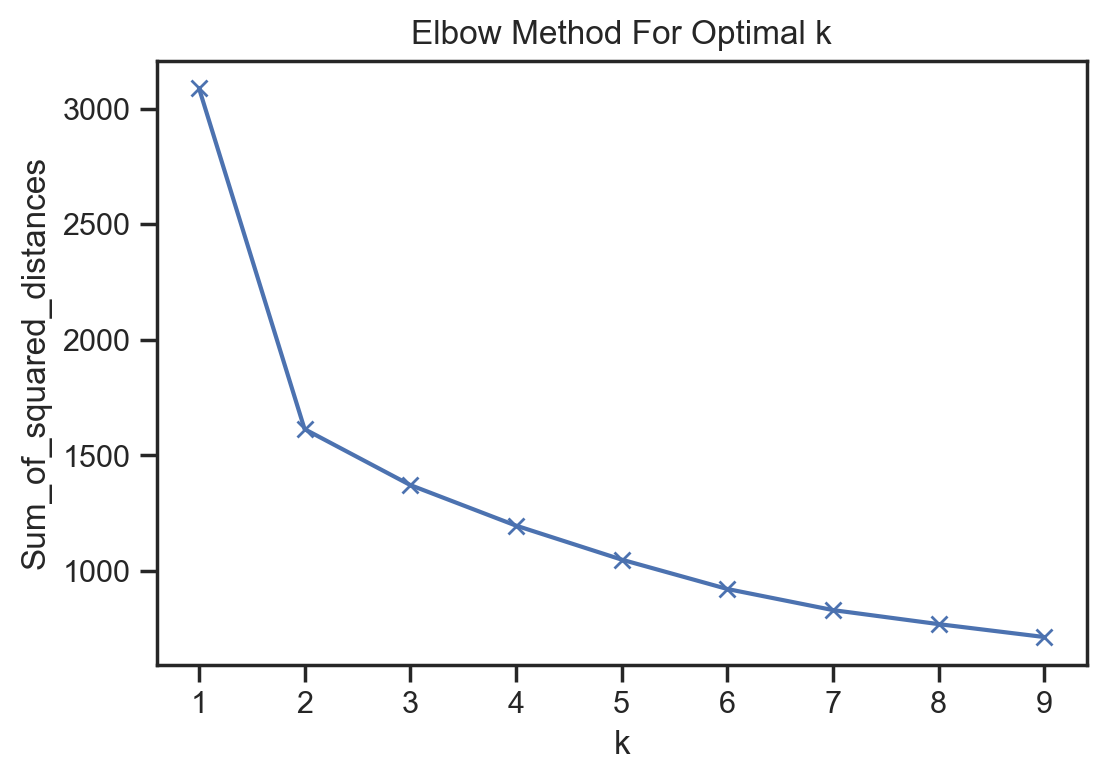

In [10]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=100, algorithm='full')
    km = km.fit(X)
    # labels 
    cluster_labels = km.labels_
    Sum_of_squared_distances.append(km.inertia_)
    print(f"Number of clusters: {k}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(int_labels, cluster_labels): .3f}")
    if k>1:
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        print("The average silhouette_score is :", silhouette_avg)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()